In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

summer_data = pd.read_csv("Survey data_Inflight Satisfaction Score.csv")

In [ ]:
summer_data['cabin_name'].value_counts()

Economy         18438
Economy Plus     8656
Name: cabin_name, dtype: int64

In [ ]:
summer_data['score'].unique()

array(['2', '5', '3', '1', '4', 'chicken entrée', 'other (specify)',
       'vegetarian entrée', 'snack basket selection',
       'sandwich/burger/wrap', 'beef entrée', 'seafood entrée'],
      dtype=object)

In [ ]:
summer_data['score'] = pd.to_numeric(summer_data['score'], errors='coerce')
summer_data.dropna(subset=['score'], inplace=True)

In [ ]:
summer_data.dropna(subset=['score'], inplace=True)

In [ ]:
summer_data['cabin_name'].unique()

array(['Economy', nan, 'Economy Plus'], dtype=object)

In [ ]:
summer_data.dropna(subset=['cabin_name'], inplace=True)

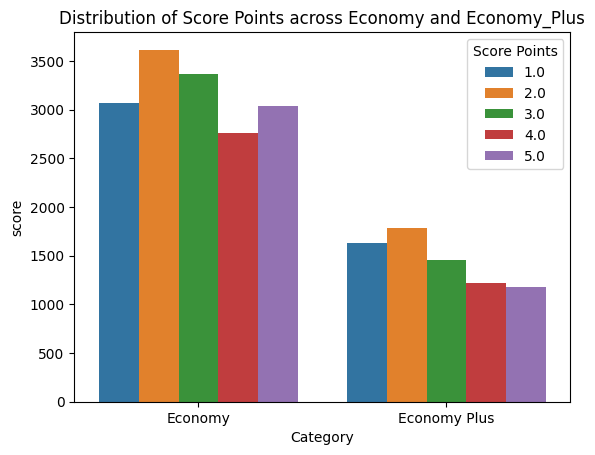

In [ ]:
sns.countplot(x='cabin_name', hue='score', data=summer_data)
plt.title("Distribution of Score Points across Economy and Economy_Plus")
plt.xlabel("Category")
plt.ylabel("score")
plt.legend(title="Score Points")
plt.show()

In [ ]:
summer_data['cabin_code_desc'].unique()

array(['Economy'], dtype=object)

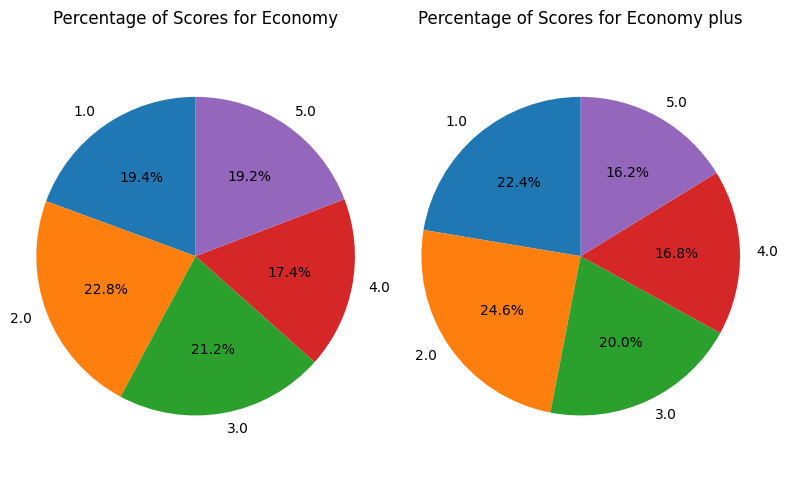

In [ ]:
# Group by cabin_name and score, and calculate the count of each combination
grouped = summer_data.groupby(['cabin_name', 'score']).size().reset_index(name='count')

# Pivot the table for easy plotting
pivot_table = grouped.pivot(index='score', columns='cabin_name', values='count').fillna(0)

# Create a percentage pie chart for each cabin_name
fig, axes = plt.subplots(1, 2, figsize=(8, 5))
for i, cabin_name in enumerate(pivot_table.columns):
    pie_data = pivot_table[cabin_name]
    total_count = pie_data.sum()
    percentages = pie_data / total_count * 100
    axes[i].pie(percentages, labels=percentages.index, autopct='%.1f%%', startangle=90)
    axes[i].set_title(f'Percentage of Scores for {cabin_name.capitalize()}')
    axes[i].axis('equal')

plt.tight_layout()
plt.show()

so here we can see that we have uniformity in economy that is the total percentage is uniformly divided across all scores which obviously should be less for less score like 1 and 2 and low percentage count for higher points in economy plus is a bigger concern.

In [ ]:
# Calculate the average scores for each cabin_name
average_scores = summer_data.groupby('cabin_name')['score'].mean()
average_scores


cabin_name
Economy         2.941685
Economy Plus    2.799340
Name: score, dtype: float64

next factor i want to look at is haul_type

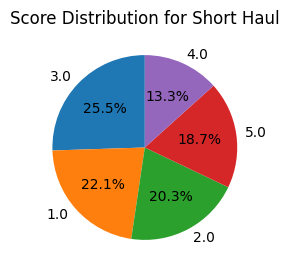

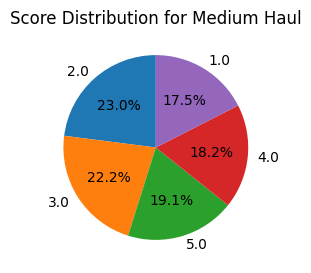

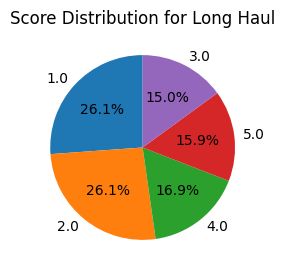

In [ ]:
haul_types = summer_data['haul_type'].unique()

# Create a pie chart for each haul type
for haul_type in haul_types:
    subset_data = summer_data[summer_data['haul_type'] == haul_type]
    scores = subset_data['score'].value_counts()
    plt.figure(figsize=(3, 3))
    plt.pie(scores, labels=scores.index, autopct='%1.1f%%', startangle=90)
    plt.title(f"Score Distribution for {haul_type} Haul")
    plt.show()

here we can see we are lacking somewhere in the long haul_type as mostly people are dissatisfied there

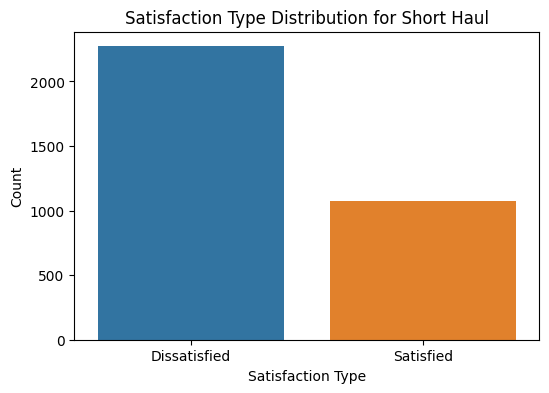

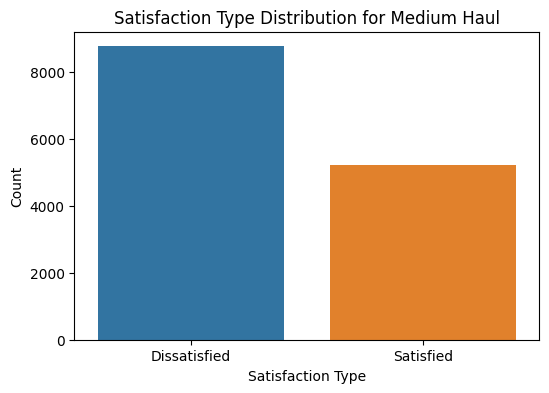

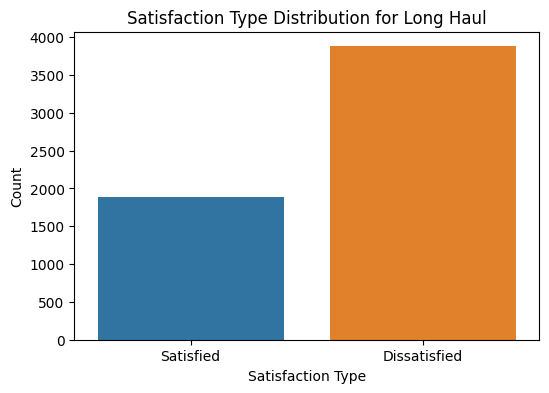

In [ ]:
# Create separate count plots for each haul type
haul_types = summer_data['haul_type'].unique()
for haul_type in haul_types:
    subset_data = summer_data[summer_data['haul_type'] == haul_type]
    plt.figure(figsize=(6, 4))
    sns.countplot(x='satisfaction_type', data=subset_data)
    plt.title(f"Satisfaction Type Distribution for {haul_type.capitalize()} Haul")
    plt.xlabel("Satisfaction Type")
    plt.ylabel("Count")
    plt.show()

In [ ]:
average_haul_score = summer_data.groupby('haul_type')['score'].mean()
print(average_haul_score)

haul_type
Long      2.702670
Medium    2.985148
Short     2.862399
Name: score, dtype: float64


let's see how we are performing at domestic and global level

In [ ]:
summer_data['international_domestic_indicator'].unique()

array(['Domestic', 'International'], dtype=object)

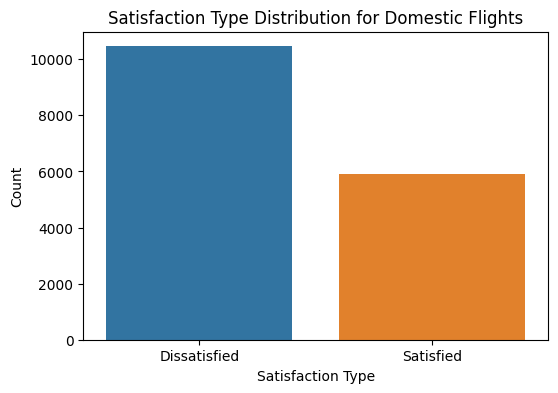

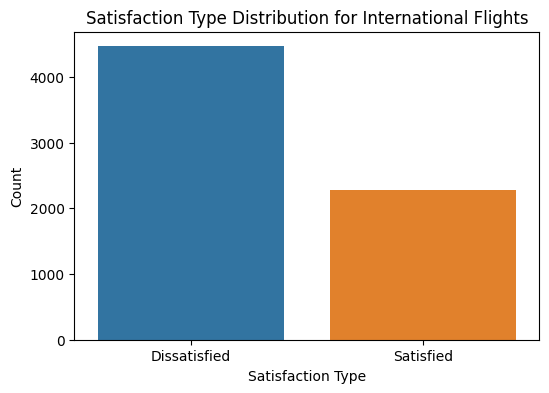

In [ ]:
indicator_values = summer_data['international_domestic_indicator'].unique()
for indicator_value in indicator_values:
    subset_data = summer_data[summer_data['international_domestic_indicator'] == indicator_value]
    plt.figure(figsize=(6, 4))
    sns.countplot(x='satisfaction_type', data=subset_data)
    plt.title(f"Satisfaction Type Distribution for {indicator_value.capitalize()} Flights")
    plt.xlabel("Satisfaction Type")
    plt.ylabel("Count")
    plt.show()

In [ ]:
average_score = summer_data.groupby('international_domestic_indicator')['score'].mean()
print(average_score)

international_domestic_indicator
Domestic         2.948326
International    2.772094
Name: score, dtype: float64


so we are performing better domestically


let's combine our current data with the preordern data using record_locator as the key using left join

In [ ]:
preorder_data=pd.read_csv('Inflight Service_Pre order data.csv')

In [ ]:
preorder_data.head()

,flight_number,departure_station_code,arrival_station_code,record_locator,carrier_code,scheduled_departure_dtl,cabin_code,meal_group,meal_category,meal_short_description,meal_description,is_entree,pre_order_qty
0,1423,INX,DEX,B3XX1H,UA,9/1/2022,J,ENTREES HOT,POULTRY,"Za'atar chicken with spinach, roasted peppers,...","Za'atar chicken with spinach, roasted peppers,...",Y,1
1,1620,IAX,CUX,BFXXJC,UA,9/2/2022,J,ENTREES HOT,BREAKFAST,Tomato and kale baked egg,Tomato and kale baked egg with fire roasted re...,Y,2
2,1852,ORX,PDX,DPXX2H,UA,9/2/2022,J,ENTREES HOT,BREAKFAST,Tomato and kale baked egg,Tomato and kale baked egg with fire roasted re...,Y,1
3,548,IAX,SFX,ELXX8H,UA,9/2/2022,J,ENTREES HOT,BREAKFAST,Scrambled eggs,"Scrambled eggs with ham, onion and peppers",Y,2
4,1155,IAX,CUX,NCXX4S,UA,9/2/2022,J,ENTREES HOT,BREAKFAST,Belgium waffle,Belgium waffle with bourbon banana fosters sau...,Y,2


In [ ]:
# Perform an left join on 'record_locator' and 'flight_number' combined
merged_data = pd.merge(summer_data, preorder_data, on=['flight_number','record_locator'], how='left')
# Create a new 'preorder' column with values 0 or 1
merged_data['preorder'] = merged_data['pre_order_qty'].apply(lambda x: 1 if pd.notnull(x) else 0)

In [ ]:
merged_data['preorder'].value_counts()

0    22855
1      453
Name: preorder, dtype: int64

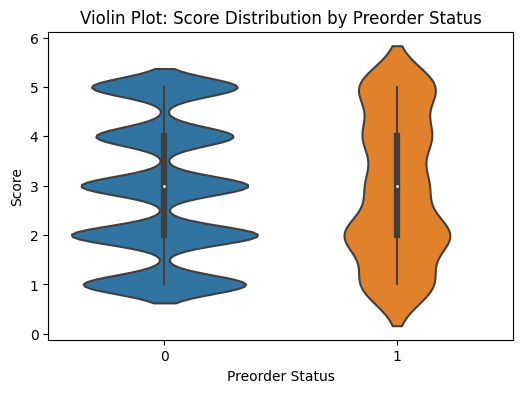

In [ ]:
# Create a violin plot
plt.figure(figsize=(6, 4))
sns.violinplot(x='preorder', y='score', data=merged_data)
plt.title("Violin Plot: Score Distribution by Preorder Status")
plt.xlabel("Preorder Status")
plt.ylabel("Score")
plt.show()

In [ ]:
average_scores = merged_data.groupby('preorder')['score'].mean()
average_scores

preorder
0    2.896609
1    2.924945
Name: score, dtype: float64

so people who preorder have given higher score points then people who don't

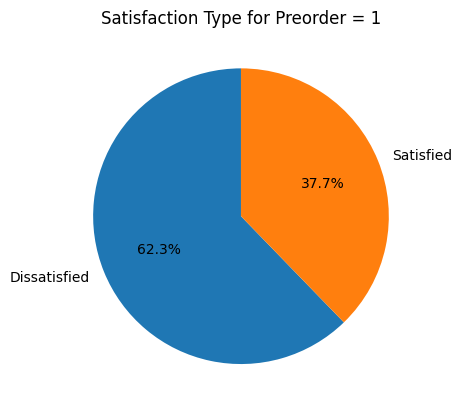

In [ ]:
# Filter the data for cases where 'preorder' is 1
preorder_1_df = merged_data[merged_data['preorder'] == 1]

# Count the occurrences of each satisfaction type
satisfaction_counts = preorder_1_df['satisfaction_type'].value_counts()

# Plot a pie chart for satisfaction type
plt.pie(satisfaction_counts, labels=satisfaction_counts.index, autopct='%1.1f%%', startangle=90)
plt.title("Satisfaction Type for Preorder = 1")
plt.show()

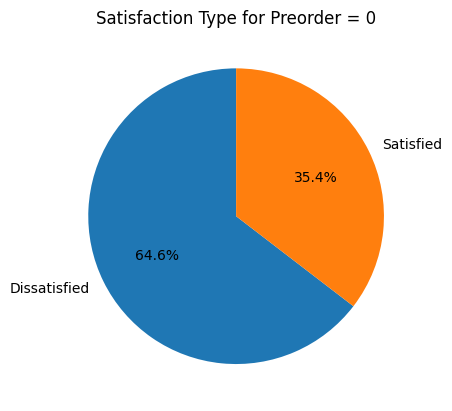

In [ ]:
# Filter the data for cases where 'preorder' is 0
preorder_1_df = merged_data[merged_data['preorder'] == 0]

# Count the occurrences of each satisfaction type
satisfaction_counts = preorder_1_df['satisfaction_type'].value_counts()

# Plot a pie chart for satisfaction type
plt.pie(satisfaction_counts, labels=satisfaction_counts.index, autopct='%1.1f%%', startangle=90)
plt.title("Satisfaction Type for Preorder = 0")
plt.show()

In [ ]:
merged_data['is_entree'].value_counts()

N    431
Y      3
Name: is_entree, dtype: int64

In [ ]:
entree_preorders = merged_data[merged_data['is_entree'] == 'Y']
entree_preorders

,flight_number,origin_station_code,destination_station_code,record_locator,scheduled_departure_date,question_text,score,satisfaction_type,driver_sub_group1,driver_sub_group2,...,carrier_code,scheduled_departure_dtl,cabin_code,meal_group,meal_category,meal_short_description,meal_description,is_entree,pre_order_qty,preorder
3535,540,SFX,OGX,LQXX1D,9/5/2022,How satisfied were you with the food & beverag...,5.0,Satisfied,food & beverage,food and beverage satisfaction,...,UA,9/5/2022,J,ENTREES HOT,POULTRY,Thai chicken,"Thai chicken with coconut ginger sauce, rice n...",Y,1.0,1
6366,1470,ORX,IAX,N2XX3V,9/9/2022,How satisfied were you with the food & beverag...,3.0,Dissatisfied,food & beverage,food and beverage satisfaction,...,UA,9/10/2022,J,ENTREES HOT,POULTRY,Za’atar chicken,NaN,Y,1.0,1
17859,1419,DEX,MIX,GTXXLZ,9/23/2022,How satisfied were you with the food & beverag...,4.0,Satisfied,food & beverage,food and beverage satisfaction,...,UA,9/29/2022,J,ENTREES HOT,BREAKFAST,Scrambled eggs,"Scrambled eggs with ham, onion and peppers",Y,1.0,1


though the data is small to comment but one thing is for sure that giving a main meal is making people satisfied and hence we should focus on that side


In [ ]:
summer_data.head()

,flight_number,origin_station_code,destination_station_code,record_locator,scheduled_departure_date,question_text,score,satisfaction_type,driver_sub_group1,driver_sub_group2,...,equipment_type_code,ua_uax,actual_flown_miles,haul_type,departure_gate,arrival_gate,international_domestic_indicator,response_group,media_provider,hub_spoke
0,3802,MKX,ORX,CYXXJJ,9/1/2022,How satisfied were you with the food & beverag...,2.0,Dissatisfied,food & beverage,food and beverage satisfaction,...,CRZ,UAX,67,Short,C12,F10,Domestic,non-member,NaN,spoke departure
3,4686,DEX,COX,PXXXLH,9/1/2022,How satisfied were you with the food & beverag...,3.0,Dissatisfied,food & beverage,food and beverage satisfaction,...,CRJ,UAX,72,Short,B82,5,Domestic,member,NaN,hub departure
5,3947,IAX,CHX,HQXXL6,9/1/2022,How satisfied were you with the food & beverag...,3.0,Dissatisfied,food & beverage,food and beverage satisfaction,...,CRZ,UAX,77,Short,A1E,NaN,Domestic,non-member,NaN,hub departure
6,3609,EWX,PHX,DPXXGS,9/1/2022,How satisfied were you with the food & beverag...,5.0,Satisfied,food & beverage,food and beverage satisfaction,...,E7R,UAX,81,Short,C115,D11R,Domestic,non-member,GOGO,hub departure
8,5099,LAX,DEX,CDXXLV,9/1/2022,How satisfied were you with the food & beverag...,1.0,Dissatisfied,food & beverage,food and beverage satisfaction,...,CRJ,UAX,113,Short,1,B54,Domestic,member,NaN,spoke departure


In [ ]:
summer_data['response_group'].unique()

array(['non-member', 'member', 'NBK'], dtype=object)

In [ ]:
summer_data['response_group'].value_counts()

member        15110
non-member     8003
NBK               3
Name: response_group, dtype: int64

In [ ]:
summer_data = summer_data[summer_data['response_group'] != 'NBK']

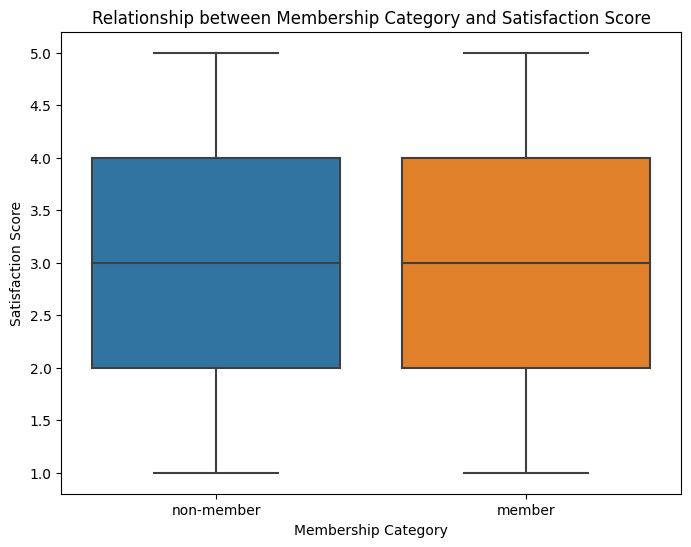

In [ ]:
# Create a box plot to visualize the relationship
plt.figure(figsize=(8, 6))
sns.boxplot(x='response_group', y='score', data=summer_data)
plt.title('Relationship between Membership Category and Satisfaction Score')
plt.xlabel('Membership Category')
plt.ylabel('Satisfaction Score')
plt.show()

In [ ]:
average_scores = summer_data.groupby('response_group')['score'].mean()
average_scores

response_group
member        2.851423
non-member    2.982881
Name: score, dtype: float64

let's check out the hub/spoke feature

In [ ]:
summer_data['hub_spoke'].unique()

array(['spoke departure', 'hub departure'], dtype=object)

In [ ]:
summer_data['hub_spoke'].value_counts()

hub departure      12166
spoke departure    10947
Name: hub_spoke, dtype: int64

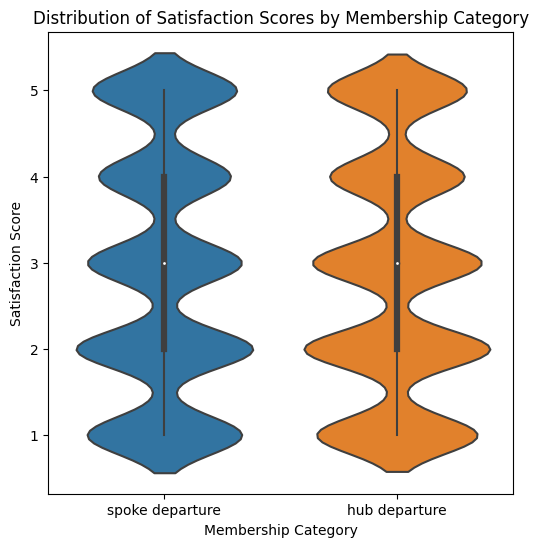

In [ ]:
plt.figure(figsize=(6, 6))
sns.violinplot(x='hub_spoke', y='score', data=summer_data)
plt.title('Distribution of Satisfaction Scores by Membership Category')
plt.xlabel('Membership Category')
plt.ylabel('Satisfaction Score')
plt.show()

In [ ]:
average_scores = summer_data.groupby('hub_spoke')['score'].mean()
average_scores

hub_spoke
hub departure      2.880815
spoke departure    2.914863
Name: score, dtype: float64

this does shows that our hub spoke model is going in the right direction

In [ ]:
inventory=pd.read_csv('Inflight Service_Inventory data.csv')
inventory.head()

,flight_number,departure_station_code,arrival_station_code,scheduled_departure_dtl,entree_product_id,entree_description,entree_code,planned_entree_count,consumed_entree_count
0,2634,IAX,PDX,9/1/2022,58019,Belgium waffle,WF,20,32
1,2666,ORX,IAX,9/1/2022,60549,Vegetarian chili and polenta cake,V,3,0
2,2310,DEX,SAX,9/2/2022,58981,Scrambled eggs,O,9,7
3,1712,SFX,CLX,9/4/2022,58764,Mediterranean Falafel Bowl,V,1,0
4,1225,LAX,HNX,9/8/2022,60549,Vegetarian chili and polenta cake,V,1,0
